# Install the needed libraries

In [1]:
!pip install https://github.com/amaiya/eli5-tf/archive/refs/heads/master.zip

     \ 6.9 MB 18.2 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=108157 sha256=40d8ccc860e91fa104e95dc54bf4e6b51be65c10be3db1e5b3529357ea544a0c
  Stored in directory: /tmp/pip-ephem-wheel-cache-z4yavdrl/wheels/0b/14/54/23c07f7254b733dc3daac99ba1fda60e30f1b2991b3b8ee0bf
Successfully built eli5


In [2]:
!pip3 install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 47.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 70.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 54.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.39.0-py3-none-any.whl size=25319737 sha256=0ee4f21277a482af4a38adf25831db76854c076fbaf6c5fc8387e43e8ff2ed1e
  Stored in directory: /root/.cache/pip/wheels/98/fd/0a/ef6252223f3d2

## Import the needed libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


In [4]:
import ktrain
from ktrain import text
MODEL_NAME = 'distilbert-base-uncased'

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Function to compute the metrics

In [5]:
def compute_classification_report(true_labels_column, predicted_labels_column):
    report = classification_report(true_labels_column, predicted_labels_column)
    accuracy = accuracy_score(true_labels_column, predicted_labels_column)
    precision = precision_score(true_labels_column, predicted_labels_column, average='macro')
    recall = recall_score(true_labels_column, predicted_labels_column, average='macro')
    f1 = f1_score(true_labels_column, predicted_labels_column, average='macro')

    print("Classification Report:")
    print(report)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    return accuracy, precision, recall, f1

# Function to plot the metrics

In [110]:
def plot_metrics(labels, accuracy_values):

    accuracy_values_scaled = [value * 100 for value in accuracy_values]

    # Create a counter plot
    fig, ax = plt.subplots()
    bar_width = 0.2  # Smaller width
    index = np.arange(len(labels))

    bars = ax.bar(index, accuracy_values_scaled, bar_width)

    # Add values on top of the bars
    for bar, value in zip(bars, accuracy_values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
                f'{value:.2f}%', ha='center', va='bottom')

    ax.set_xlabel('Datasets')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title('BERT Accuracy Comparison')
    ax.set_xticks(index)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# DistilBERT for 4 topics

## Read data

In [6]:
df2 = pd.read_csv("https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv")
df2.columns = ["label" , "title" , "content"]
df2['label'] = df2['label'].map({1: "world", 2: "sports", 3: "business", 4: "sci/tech"})


In [7]:
df2

,label,title,content
0,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
1,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
2,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
3,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
4,business,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...
...,...,...,...
119994,world,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119995,sports,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119996,sports,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119997,sports,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [8]:
X = df2.content
Y = df2.label

## Split the data

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X,Y , shuffle=True, test_size = 0.8, random_state = 12342 , stratify=Y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, shuffle=True, test_size = 0.8, random_state = 12342 , stratify=y_temp)


In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(23999,)
(23999,)
(19200,)
(19200,)
(76800,)
(76800,)


In [11]:
x_train = X_train.values
x_val = X_val.values
y_train = y_train.values
y_val = y_val.values
x_test = X_test.values
y_test = y_test.values

## Text preprocessing

In [15]:
t = text.Transformer(MODEL_NAME, class_names=["world", "sport", "business" , "sci/tech"])
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_val, y_val)

preprocessing train...
language: en
train sequence lengths:
	mean : 31
	95percentile : 45
	99percentile : 62


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 31
	95percentile : 45
	99percentile : 62


## Download the model

In [16]:
model = t.get_classifier()
learner_1 = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=16)
learner_2 = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=16)

## Using the cyclical learning rate policy

simulating training for different learning rates... this may take a few moments...
Epoch 1/4
1499/1499 [==============================] - 104s 59ms/step - loss: 0.9382 - accuracy: 0.6398
Epoch 2/4
1499/1499 [==============================] - 92s 61ms/step - loss: 0.5357 - accuracy: 0.7928
Epoch 3/4
1499/1499 [==============================] - 16s 11ms/step - loss: 1.2763 - accuracy: 0.3455


done.
Visually inspect loss plot and select learning rate associated with falling loss
Three possible suggestions for LR from plot:
	Longest valley (red): 2.23E-06
	Min numerical gradient (purple): 9.12E-06
	Min loss divided by 10 (omitted from plot): 4.19E-06


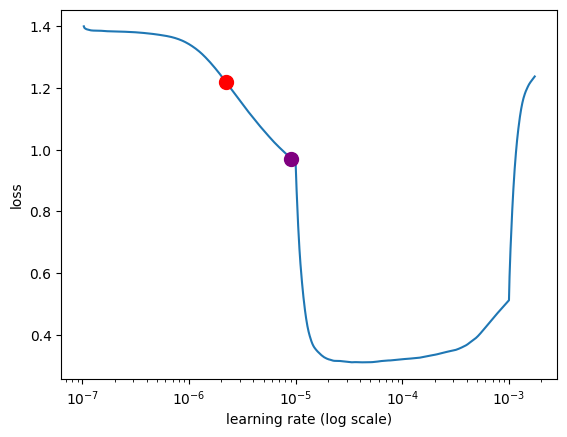

In [17]:
learner_1.lr_find(show_plot=True, max_epochs=4, suggest= True)


In [18]:
learner_1.fit_onecycle(9.12E-06, 5)



begin training using onecycle policy with max lr of 9.12e-06...
Epoch 1/5
1500/1500 [==============================] - 126s 76ms/step - loss: 0.4693 - accuracy: 0.8616 - val_loss: 0.2853 - val_accuracy: 0.9077
Epoch 2/5
1500/1500 [==============================] - 111s 74ms/step - loss: 0.2493 - accuracy: 0.9167 - val_loss: 0.2375 - val_accuracy: 0.9194
Epoch 3/5
1500/1500 [==============================] - 111s 74ms/step - loss: 0.1876 - accuracy: 0.9375 - val_loss: 0.2255 - val_accuracy: 0.9241
Epoch 4/5
1500/1500 [==============================] - 111s 74ms/step - loss: 0.1311 - accuracy: 0.9589 - val_loss: 0.2277 - val_accuracy: 0.9251
Epoch 5/5
1500/1500 [==============================] - 111s 74ms/step - loss: 0.0924 - accuracy: 0.9724 - val_loss: 0.2409 - val_accuracy: 0.9243


In [19]:
learner_1.validate(class_names=t.get_classes())

600/600 [==============================] - 23s 36ms/step
              precision    recall  f1-score   support

    business       0.89      0.88      0.89      4800
    sci/tech       0.89      0.90      0.90      4800
      sports       0.98      0.98      0.98      4800
       world       0.93      0.94      0.93      4800

    accuracy                           0.92     19200
   macro avg       0.92      0.92      0.92     19200
weighted avg       0.92      0.92      0.92     19200



array([[4246,  362,   28,  164],
       [ 328, 4322,   13,  137],
       [  36,   26, 4682,   56],
       [ 135,  122,   47, 4496]])

## Using the triangular learning rate policy

simulating training for different learning rates... this may take a few moments...
Epoch 1/4
1499/1499 [==============================] - 92s 58ms/step - loss: 1.0334 - accuracy: 0.5936
Epoch 2/4
1499/1499 [==============================] - 92s 61ms/step - loss: 0.4462 - accuracy: 0.8375
Epoch 3/4
1499/1499 [==============================] - 10s 7ms/step - loss: 1.3877 - accuracy: 0.2445


done.
Visually inspect loss plot and select learning rate associated with falling loss
Three possible suggestions for LR from plot:
	Longest valley (red): 5.28E-06
	Min numerical gradient (purple): 9.06E-06
	Min loss divided by 10 (omitted from plot): 4.94E-06


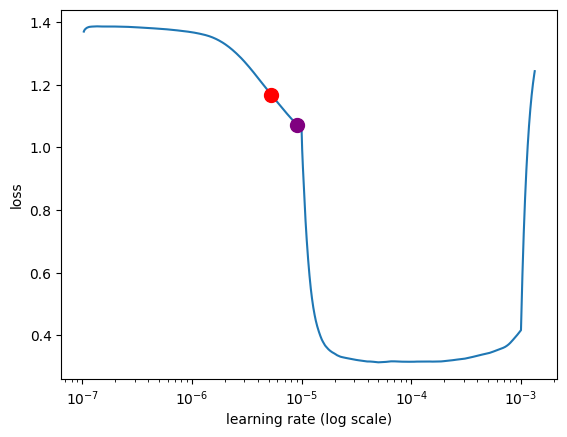

In [20]:
learner_2.lr_find(show_plot=True, max_epochs=4, suggest= True)

In [22]:
learner_2.autofit(9.06E-06, 5)



begin training using triangular learning rate policy with max lr of 9.06e-06...
Epoch 1/5
1500/1500 [==============================] - 117s 75ms/step - loss: 0.3865 - accuracy: 0.8800 - val_loss: 0.2506 - val_accuracy: 0.9158
Epoch 2/5
1500/1500 [==============================] - 111s 74ms/step - loss: 0.2116 - accuracy: 0.9308 - val_loss: 0.2302 - val_accuracy: 0.9231
Epoch 3/5
1500/1500 [==============================] - 111s 74ms/step - loss: 0.1692 - accuracy: 0.9448 - val_loss: 0.2249 - val_accuracy: 0.9235
Epoch 4/5
1500/1500 [==============================] - 111s 74ms/step - loss: 0.1380 - accuracy: 0.9578 - val_loss: 0.2300 - val_accuracy: 0.9246
Epoch 5/5
1500/1500 [==============================] - 111s 74ms/step - loss: 0.1104 - accuracy: 0.9665 - val_loss: 0.2375 - val_accuracy: 0.9253


In [23]:
learner_2.validate(class_names=t.get_classes())

600/600 [==============================] - 23s 36ms/step
              precision    recall  f1-score   support

    business       0.90      0.88      0.89      4800
    sci/tech       0.89      0.91      0.90      4800
      sports       0.98      0.97      0.98      4800
       world       0.93      0.93      0.93      4800

    accuracy                           0.93     19200
   macro avg       0.93      0.93      0.93     19200
weighted avg       0.93      0.93      0.93     19200



array([[4229,  394,   26,  151],
       [ 280, 4379,   16,  125],
       [  32,   25, 4679,   64],
       [ 140,  135,   47, 4478]])

## Compute the metrics for testing set

In [24]:
predictor_1 = ktrain.get_predictor(learner_1.model, preproc=t)
predictor_2 = ktrain.get_predictor(learner_2.model, preproc=t)

In [25]:
y_pred_1 = predictor_1.predict(x_test)
y_pred_2 = predictor_2.predict(x_test)

In [26]:
accuracy_4_1, precision_4_1, recall_4_1, f1_4_1 = compute_classification_report(y_test , y_pred_1)

Classification Report:
              precision    recall  f1-score   support

    business       0.90      0.89      0.89     19200
    sci/tech       0.89      0.90      0.89     19200
      sports       0.98      0.98      0.98     19200
       world       0.93      0.94      0.93     19200

    accuracy                           0.92     76800
   macro avg       0.92      0.92      0.92     76800
weighted avg       0.92      0.92      0.92     76800

Accuracy: 0.9242708333333334
Precision: 0.9242532310923857
Recall: 0.9242708333333334
F1 Score: 0.924251307445173


In [27]:
accuracy_4_2, precision_4_2, recall_4_2, f1_4_2 = compute_classification_report(y_test , y_pred_2)

Classification Report:
              precision    recall  f1-score   support

    business       0.90      0.88      0.89     19200
    sci/tech       0.88      0.91      0.90     19200
      sports       0.98      0.98      0.98     19200
       world       0.94      0.93      0.93     19200

    accuracy                           0.92     76800
   macro avg       0.93      0.92      0.92     76800
weighted avg       0.93      0.92      0.92     76800

Accuracy: 0.9248177083333333
Precision: 0.9251025707215161
Recall: 0.9248177083333334
F1 Score: 0.924859273262152


## Save the models

In [107]:
predictor_1.save('/content/drive/MyDrive/Topics/distilbert_4_topics_1_92.42')
predictor_2.save('/content/drive/MyDrive/Topics/distilbert_4_topics_2_92.84')


In [105]:
# reloaded_predictor_1 = ktrain.load_predictor('/content/tmp/distilbert_4_topics_1')
# reloaded_predictor_2 = ktrain.load_predictor('/content/tmp/distilbert_4_topics_2')

# DistilBERT for 6 topics

## Read data

In [29]:
train = pd.read_csv("https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/TOPICS/DATA/news_data%206%20categories/train.csv")
test = pd.read_csv("https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/TOPICS/DATA/news_data%206%20categories/test.csv")

In [30]:
train

,Title,Excerpt,Category
0,"Uefa Opens Proceedings against Barcelona, Juve...",Uefa has opened disciplinary proceedings again...,sports
1,Amazon Blames Inflation as It Increases Cost o...,The increases are steeper than the 17 percent ...,business
2,Nigeria’s Parliament Passes Amended Electoral ...,Nigeria's Senate on Tuesday passed the harmoni...,politics
3,Nigeria: Lagos Governor Tests Positive for Cov...,"The Lagos State Governor, Mr. Babajide Sanwo-O...",health
4,South Africa Calls For Calm as Electoral Refor...,South Africa has raised concerns about the det...,politics
...,...,...,...
4681,Uganda Drops Charges Against Nigerian Singers ...,Nigerian singers Omah Lay and Tems are set to ...,entertainment
4682,NNPC Cuts Directors’ Fees by 60.2%,The Nigerian National Petroleum Corporation (N...,business
4683,Nigeria’s External Reserves Hit $37bn with $3....,Nigeria’s foreign reserves will get a timely b...,business
4684,Transcorp Hilton Wins Africa’s Leading Busines...,Transcorp Hilton Abuja has been honoured with ...,business


In [31]:
train.Category.value_counts()

business         1268
sports           1124
politics         1073
health            550
entertainment     382
tech              289
Name: Category, dtype: int64

In [32]:
X = train.Excerpt
Y = train.Category

## Split the data

In [35]:
X_train, X_temp, y_train, y_temp = train_test_split(X,Y , shuffle=True, test_size = 0.5, random_state = 12342 , stratify=Y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, shuffle=True, test_size = 0.5, random_state = 12342 , stratify=y_temp)


In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(2343,)
(2343,)
(1171,)
(1171,)
(1172,)
(1172,)


In [37]:
x_train = X_train.values
x_val = X_val.values
y_train = y_train.values
y_val = y_val.values
x_test = X_test.values
y_test = y_test.values

## Text preprocessing

In [38]:
t = text.Transformer(MODEL_NAME, class_names=["business", "sports", "politics" , "health", "entertainment", "tech"])
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_val, y_val)

preprocessing train...
language: en
train sequence lengths:
	mean : 20
	95percentile : 20
	99percentile : 22


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 20
	95percentile : 20
	99percentile : 23


## Download the model

In [39]:
model = t.get_classifier()
learner_1 = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=16)
learner_2 = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=16)

## Using the cyclical learning rate policy

simulating training for different learning rates... this may take a few moments...
Epoch 1/4
146/146 [==============================] - 17s 59ms/step - loss: 1.6038 - accuracy: 0.4735
Epoch 2/4
146/146 [==============================] - 9s 62ms/step - loss: 0.8023 - accuracy: 0.7654
Epoch 3/4
146/146 [==============================] - 9s 61ms/step - loss: 2.5832 - accuracy: 0.2587
Epoch 4/4
146/146 [==============================] - 1s 4ms/step - loss: 8.0644 - accuracy: 0.3107


done.
Visually inspect loss plot and select learning rate associated with falling loss
Three possible suggestions for LR from plot:
	Longest valley (red): 8.54E-06
	Min numerical gradient (purple): 3.64E-06
	Min loss divided by 10 (omitted from plot): 6.43E-05


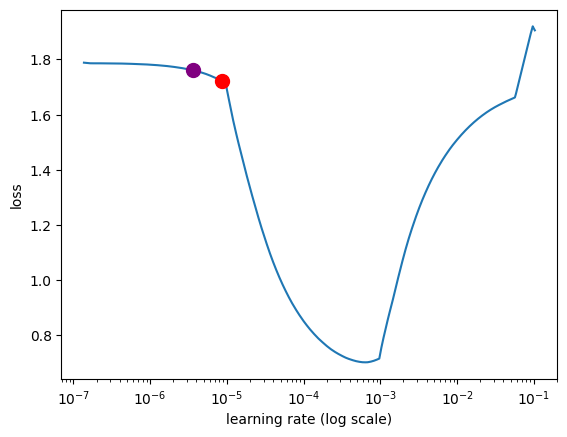

In [40]:
learner_1.lr_find(show_plot=True, max_epochs=4, suggest= True)


In [41]:
learner_1.fit_onecycle(3.64E-06, 5)



begin training using onecycle policy with max lr of 3.64e-06...
Epoch 1/5
147/147 [==============================] - 20s 77ms/step - loss: 1.5946 - accuracy: 0.5356 - val_loss: 1.1813 - val_accuracy: 0.7558
Epoch 2/5
147/147 [==============================] - 9s 64ms/step - loss: 0.8442 - accuracy: 0.8143 - val_loss: 0.6148 - val_accuracy: 0.8420
Epoch 3/5
147/147 [==============================] - 9s 64ms/step - loss: 0.4911 - accuracy: 0.8835 - val_loss: 0.4776 - val_accuracy: 0.8642
Epoch 4/5
147/147 [==============================] - 9s 64ms/step - loss: 0.3536 - accuracy: 0.9172 - val_loss: 0.4415 - val_accuracy: 0.8736
Epoch 5/5
147/147 [==============================] - 9s 64ms/step - loss: 0.3034 - accuracy: 0.9270 - val_loss: 0.4357 - val_accuracy: 0.8728


In [42]:
learner_1.validate(class_names=t.get_classes())

37/37 [==============================] - 2s 23ms/step
               precision    recall  f1-score   support

     business       0.82      0.86      0.84       317
entertainment       0.89      0.81      0.85        96
       health       0.86      0.85      0.86       137
     politics       0.90      0.92      0.91       268
       sports       0.96      0.97      0.96       281
         tech       0.62      0.47      0.54        72

     accuracy                           0.87      1171
    macro avg       0.84      0.82      0.83      1171
 weighted avg       0.87      0.87      0.87      1171



array([[273,   5,   7,  13,   3,  16],
       [  5,  78,   3,   3,   5,   2],
       [ 13,   2, 117,   4,   0,   1],
       [  8,   1,   7, 247,   3,   2],
       [  4,   2,   1,   1, 273,   0],
       [ 30,   0,   1,   6,   1,  34]])

## Using the triangular learning rate policy

simulating training for different learning rates... this may take a few moments...
Epoch 1/4
146/146 [==============================] - 9s 59ms/step - loss: 1.7563 - accuracy: 0.3074
Epoch 2/4
146/146 [==============================] - 9s 62ms/step - loss: 0.9340 - accuracy: 0.7349
Epoch 3/4
146/146 [==============================] - 9s 61ms/step - loss: 1.7504 - accuracy: 0.2699
Epoch 4/4
146/146 [==============================] - 2s 13ms/step - loss: 510.5666 - accuracy: 0.2460


done.
Visually inspect loss plot and select learning rate associated with falling loss
Three possible suggestions for LR from plot:
	Longest valley (red): 1.61E-05
	Min numerical gradient (purple): 2.20E-05
	Min loss divided by 10 (omitted from plot): 9.69E-05


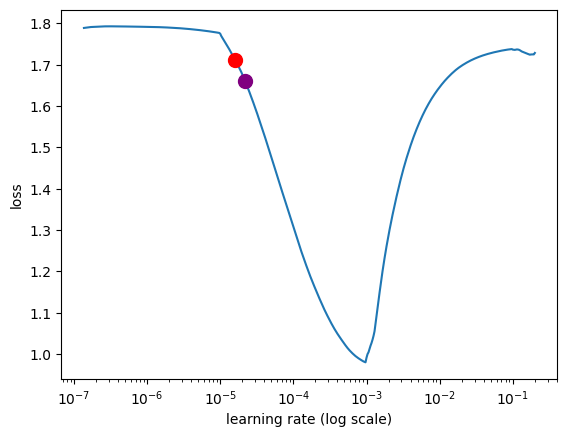

In [43]:
learner_2.lr_find(show_plot=True, max_epochs=4, suggest= True)

In [44]:
learner_2.autofit(2.20E-05, 5)



begin training using triangular learning rate policy with max lr of 2.2e-05...
Epoch 1/5
147/147 [==============================] - 19s 77ms/step - loss: 0.7791 - accuracy: 0.7759 - val_loss: 0.4010 - val_accuracy: 0.8770
Epoch 2/5
147/147 [==============================] - 9s 64ms/step - loss: 0.3106 - accuracy: 0.9104 - val_loss: 0.3912 - val_accuracy: 0.8770
Epoch 3/5
147/147 [==============================] - 9s 64ms/step - loss: 0.2139 - accuracy: 0.9368 - val_loss: 0.3989 - val_accuracy: 0.8770
Epoch 4/5
147/147 [==============================] - 9s 64ms/step - loss: 0.1587 - accuracy: 0.9552 - val_loss: 0.4458 - val_accuracy: 0.8753
Epoch 5/5
147/147 [==============================] - 9s 64ms/step - loss: 0.1297 - accuracy: 0.9616 - val_loss: 0.4675 - val_accuracy: 0.8753


In [45]:
learner_2.validate(class_names=t.get_classes())

37/37 [==============================] - 2s 23ms/step
               precision    recall  f1-score   support

     business       0.85      0.82      0.83       317
entertainment       0.87      0.86      0.87        96
       health       0.88      0.86      0.87       137
     politics       0.88      0.94      0.91       268
       sports       0.98      0.97      0.97       281
         tech       0.58      0.57      0.57        72

     accuracy                           0.88      1171
    macro avg       0.84      0.84      0.84      1171
 weighted avg       0.87      0.88      0.87      1171



array([[259,   6,   9,  18,   2,  23],
       [  3,  83,   2,   4,   1,   3],
       [ 13,   1, 118,   3,   0,   2],
       [  8,   1,   4, 251,   3,   1],
       [  2,   2,   1,   2, 273,   1],
       [ 21,   2,   0,   8,   0,  41]])

## Compute the metrics for testing set

In [46]:
predictor_1 = ktrain.get_predictor(learner_1.model, preproc=t)
predictor_2 = ktrain.get_predictor(learner_2.model, preproc=t)

In [47]:
y_pred_1 = predictor_1.predict(x_test)
y_pred_2 = predictor_2.predict(x_test)

In [48]:
accuracy_6_1, precision_6_1, recall_6_1, f1_6_1 = compute_classification_report(y_test , y_pred_1)

Classification Report:
               precision    recall  f1-score   support

     business       0.81      0.90      0.85       317
entertainment       0.89      0.87      0.88        95
       health       0.86      0.87      0.87       138
     politics       0.94      0.88      0.91       269
       sports       0.97      0.98      0.97       281
         tech       0.58      0.46      0.51        72

     accuracy                           0.88      1172
    macro avg       0.84      0.82      0.83      1172
 weighted avg       0.88      0.88      0.88      1172

Accuracy: 0.878839590443686
Precision: 0.8430593817509727
Recall: 0.8249823671540989
F1 Score: 0.8322798791447915


In [49]:
accuracy_6_2, precision_6_2, recall_6_2, f1_6_2 = compute_classification_report(y_test , y_pred_2)

Classification Report:
               precision    recall  f1-score   support

     business       0.82      0.84      0.83       317
entertainment       0.88      0.92      0.90        95
       health       0.86      0.88      0.87       138
     politics       0.93      0.89      0.91       269
       sports       0.99      0.96      0.97       281
         tech       0.51      0.53      0.52        72

     accuracy                           0.87      1172
    macro avg       0.83      0.84      0.83      1172
 weighted avg       0.88      0.87      0.87      1172

Accuracy: 0.8728668941979523
Precision: 0.8310374636783187
Recall: 0.8359495900195263
F1 Score: 0.8332586203865103


## Save the models

In [108]:
predictor_1.save('/content/drive/MyDrive/Topics/distilbert_6_topics_1_87.88')
predictor_2.save('/content/drive/MyDrive/Topics/distilbert_6_topics_2_87.28')


# DistilBERT for 17 topics

## Read data

In [51]:
df = pd.read_csv("https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/TOPICS/DATA/MN-DS-news-classification.csv")
df = df.rename(columns={'category_level_1': 'category_1', 'category_level_2': 'category_2'})

In [52]:
df

,data_id,id,date,source,title,content,author,url,published,published_utc,collection_utc,category_1,category_2
0,1809,abcnews--2019-10-31--Virginia mom charged with...,2019-10-31,abcnews,Virginia mom charged with murder in 2-year-old...,The Virginia woman whose 2-year-old son was fo...,NaN,https://abcnews.go.com/US/wireStory/virginia-m...,"Thu, 31 Oct 2019 16:49:56 -0400",1572554996,1572559512,"crime, law and justice",crime
1,1980,abcnews--2019-11-07--2 escaped murder suspects...,2019-11-07,abcnews,2 escaped murder suspects arrested at US-Mexic...,Authorities are trying to determine if anyone ...,NaN,https://abcnews.go.com/US/wireStory/escaped-mu...,"Thu, 07 Nov 2019 00:13:12 -0500",1573103592,1573131986,"crime, law and justice",crime
2,1995,abcnews--2019-11-07--Family turns in escaped b...,2019-11-07,abcnews,"Family turns in escaped boy, 13, suspected in ...",A 13-year-old suspect in a double homicide who...,NaN,https://abcnews.go.com/US/wireStory/family-tur...,"Thu, 07 Nov 2019 07:39:54 -0500",1573130394,1573131982,"crime, law and justice",crime
3,2740,abcnews--2019-12-02--Mother charged with murde...,2019-12-02,abcnews,Mother charged with murder in deaths of 2 youn...,The mother of two young children found hanging...,NaN,https://abcnews.go.com/US/wireStory/mother-cha...,"Mon, 02 Dec 2019 11:30:59 -0500",1575304259,1575308811,"crime, law and justice",crime
4,7038,ageofautism--2019-04-12--Physician Father and ...,2019-04-12,ageofautism,"Physician, Father and Caretaker of 29 Year Old...","""One family member said Derek “can be violent ...",Age of Autism,http://feedproxy.google.com/~r/ageofautism/~3/...,2019-04-12 09:00:00+00:00,1555074000,1567543083,"crime, law and justice",crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10912,907640,therussophileorg--2019-12-15--Iran to build ov...,2019-12-15,therussophileorg,"Iran to build over 30,000 housing units in Syr...",This post was originally published on this sit...,News Desk,https://www.therussophile.org/iran-to-build-ov...,"Sun, 15 Dec 2019 10:42:50 +0000",1576424570,1576413702,"conflict, war and peace",post-war reconstruction
10913,892720,therussophileorg--2019-10-12--Ukraine has no m...,2019-10-12,therussophileorg,Ukraine has no money for reconstruction of Don...,This post was originally published on this sit...,Michael Sullivan,https://www.therussophile.org/ukraine-has-no-m...,"Sat, 12 Oct 2019 20:56:01 +0000",1570928161,1570922006,"conflict, war and peace",post-war reconstruction
10914,870499,therussophileorg--2019-07-06--Irans contributi...,2019-07-06,therussophileorg,Iran’s contribution is needed to rebuild Iraq ...,This\n\n[post](http://www.presstv.ir/Detail/20...,Michael Sullivan,https://www.therussophile.org/irans-contributi...,2019-07-06 17:51:38+00:00,1562449898,1567536625,"conflict, war and peace",post-war reconstruction
10915,887334,therussophileorg--2019-09-25--Iraqi president ...,2019-09-25,therussophileorg,Iraqi president demands international help for...,This\n\n[post](http://www.presstv.ir/Detail/20...,Michael Sullivan,https://www.therussophile.org/iraqi-president-...,2019-09-25 16:58:01+00:00,1569445081,1570222223,"conflict, war and peace",post-war reconstruction


In [53]:
df["category_1"].value_counts()

society                                      1100
sport                                         907
politics                                      900
conflict, war and peace                       800
religion and belief                           800
science and technology                        800
labour                                        703
health                                        700
education                                     607
environment                                   600
human interest                                600
crime, law and justice                        500
disaster, accident and emergency incident     500
weather                                       400
economy, business and finance                 400
arts, culture, entertainment and media        300
lifestyle and leisure                         300
Name: category_1, dtype: int64

In [68]:
X = df.content
Y = df.category_1

## Split the data

In [69]:
X_train, X_temp, y_train, y_temp = train_test_split(X,Y , shuffle=True, test_size = 0.5, random_state = 12342 , stratify=Y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, shuffle=True, test_size = 0.5, random_state = 12342 , stratify=y_temp)


In [70]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(5458,)
(5458,)
(2729,)
(2729,)
(2730,)
(2730,)


In [71]:
x_train = X_train.values
x_val = X_val.values
y_train = y_train.values
y_val = y_val.values
x_test = X_test.values
y_test = y_test.values

## Text preprocessing

In [72]:
t = text.Transformer(MODEL_NAME, class_names=["society", "sport", "politics" , "conflict, war and peace" , "religion and belief" , "science and technology" , "labour" ,
                                                                                                        "health", "education", "environment", "human interest" , "crime, law and justice" , "disaster, accident and emergency incident" ,
                                                                                                        "weather" , "economy, business and finance" , "arts, culture, entertainment and media" , "lifestyle and leisure"])
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_val, y_val)

preprocessing train...
language: en
train sequence lengths:
	mean : 634
	95percentile : 1638
	99percentile : 3297


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 634
	95percentile : 1556
	99percentile : 3594


## Download the model

In [73]:
model = t.get_classifier()
learner_1 = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=16)
learner_2 = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=16)

## Using the cyclical learning rate policy

simulating training for different learning rates... this may take a few moments...
Epoch 1/4
341/341 [==============================] - 29s 59ms/step - loss: 2.7012 - accuracy: 0.1996
Epoch 2/4
341/341 [==============================] - 21s 62ms/step - loss: 1.9116 - accuracy: 0.4552
Epoch 3/4
341/341 [==============================] - 21s 61ms/step - loss: 3.7900 - accuracy: 0.0836
Epoch 4/4
341/341 [==============================] - 21s 61ms/step - loss: 3.4976 - accuracy: 0.0722


done.
Visually inspect loss plot and select learning rate associated with falling loss
Three possible suggestions for LR from plot:
	Longest valley (red): 5.60E-06
	Min numerical gradient (purple): 7.95E-06
	Min loss divided by 10 (omitted from plot): 2.42E-05


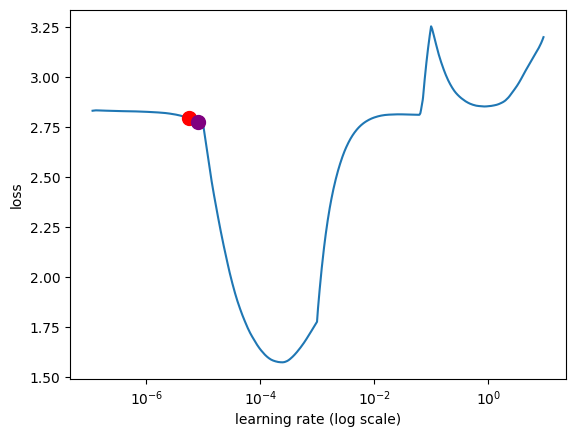

In [74]:
learner_1.lr_find(show_plot=True, max_epochs=4, suggest= True)

In [75]:
learner_1.fit_onecycle(7.95E-06, 5)



begin training using onecycle policy with max lr of 7.95e-06...
Epoch 1/5
342/342 [==============================] - 35s 76ms/step - loss: 2.5382 - accuracy: 0.3272 - val_loss: 2.0128 - val_accuracy: 0.5852
Epoch 2/5
342/342 [==============================] - 23s 68ms/step - loss: 1.6161 - accuracy: 0.6427 - val_loss: 1.3041 - val_accuracy: 0.6603
Epoch 3/5
342/342 [==============================] - 23s 68ms/step - loss: 1.0862 - accuracy: 0.7298 - val_loss: 1.0843 - val_accuracy: 0.6995
Epoch 4/5
342/342 [==============================] - 23s 68ms/step - loss: 0.7838 - accuracy: 0.8087 - val_loss: 1.0122 - val_accuracy: 0.7156
Epoch 5/5
342/342 [==============================] - 23s 68ms/step - loss: 0.6514 - accuracy: 0.8507 - val_loss: 0.9935 - val_accuracy: 0.7241


In [76]:
learner_1.validate(class_names=t.get_classes())

86/86 [==============================] - 5s 38ms/step
                                           precision    recall  f1-score   support

   arts, culture, entertainment and media       0.62      0.31      0.41        75
                  conflict, war and peace       0.74      0.83      0.78       200
                   crime, law and justice       0.72      0.71      0.72       125
disaster, accident and emergency incident       0.70      0.58      0.63       125
            economy, business and finance       0.74      0.70      0.72       100
                                education       0.77      0.74      0.75       151
                              environment       0.77      0.85      0.81       150
                                   health       0.73      0.78      0.76       175
                           human interest       0.53      0.60      0.56       150
                                   labour       0.80      0.82      0.81       176
                    lifestyle an

array([[ 23,   0,   3,   0,   0,   1,   0,   0,  16,   0,   0,   6,   4,
          3,  13,   6,   0],
       [  3, 166,   1,   2,   4,   1,   0,   0,   1,   2,   0,  11,   4,
          1,   3,   0,   1],
       [  0,   2,  89,   6,   2,   0,   1,   2,   1,   1,   0,   9,   3,
          2,   7,   0,   0],
       [  1,   6,   2,  72,   2,   2,   5,   2,   4,   1,   0,   3,   1,
          3,   1,   1,  19],
       [  0,   3,   1,   1,  70,   0,   2,   0,   0,  11,   0,   8,   0,
          2,   2,   0,   0],
       [  1,   2,   2,   3,   1, 112,   1,   1,   1,   5,   0,   4,   7,
          4,   5,   2,   0],
       [  0,   0,   0,   3,   2,   0, 127,   0,   2,   0,   0,   3,   1,
         10,   0,   1,   1],
       [  0,   0,   2,   1,   0,   2,   3, 137,   4,   0,   1,   4,   1,
          9,  11,   0,   0],
       [  3,   1,   2,   1,   1,   2,   6,   1,  90,   0,   0,   4,   2,
          5,  19,  13,   0],
       [  1,   0,   3,   0,   1,   6,   0,   2,   0, 144,   0,   3,   1,
         

## Using the triangular learning rate policy

simulating training for different learning rates... this may take a few moments...
Epoch 1/4
341/341 [==============================] - 21s 59ms/step - loss: 2.8158 - accuracy: 0.0773
Epoch 2/4
341/341 [==============================] - 21s 61ms/step - loss: 2.0103 - accuracy: 0.4434
Epoch 3/4
341/341 [==============================] - 21s 62ms/step - loss: 2.8098 - accuracy: 0.0911
Epoch 4/4
341/341 [==============================] - 8s 25ms/step - loss: 487.6650 - accuracy: 0.0789


done.
Visually inspect loss plot and select learning rate associated with falling loss
Three possible suggestions for LR from plot:
	Longest valley (red): 1.44E-05
	Min numerical gradient (purple): 5.71E-05
	Min loss divided by 10 (omitted from plot): 5.99E-05


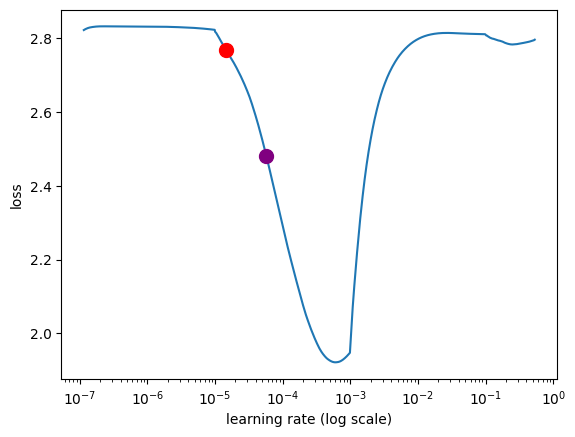

In [77]:
learner_2.lr_find(show_plot=True, max_epochs=4, suggest= True)

In [78]:
learner_2.autofit(5.71E-05, 5)



begin training using triangular learning rate policy with max lr of 5.71e-05...
Epoch 1/5
342/342 [==============================] - 34s 74ms/step - loss: 1.5087 - accuracy: 0.5713 - val_loss: 1.0277 - val_accuracy: 0.7021
Epoch 2/5
342/342 [==============================] - 23s 69ms/step - loss: 0.7786 - accuracy: 0.7891 - val_loss: 0.9278 - val_accuracy: 0.7281
Epoch 3/5
342/342 [==============================] - 23s 68ms/step - loss: 0.5166 - accuracy: 0.8595 - val_loss: 0.9531 - val_accuracy: 0.7365
Epoch 4/5
342/342 [==============================] - 23s 68ms/step - loss: 0.3670 - accuracy: 0.9040 - val_loss: 0.9811 - val_accuracy: 0.7457
Epoch 5/5
342/342 [==============================] - 23s 68ms/step - loss: 0.2508 - accuracy: 0.9333 - val_loss: 1.0904 - val_accuracy: 0.7362


In [79]:
learner_2.validate(class_names=t.get_classes())

86/86 [==============================] - 5s 37ms/step
                                           precision    recall  f1-score   support

   arts, culture, entertainment and media       0.62      0.64      0.63        75
                  conflict, war and peace       0.73      0.84      0.78       200
                   crime, law and justice       0.78      0.66      0.72       125
disaster, accident and emergency incident       0.64      0.64      0.64       125
            economy, business and finance       0.72      0.71      0.71       100
                                education       0.78      0.82      0.80       151
                              environment       0.82      0.77      0.79       150
                                   health       0.70      0.77      0.73       175
                           human interest       0.69      0.76      0.72       150
                                   labour       0.84      0.74      0.79       176
                    lifestyle an

array([[ 48,   1,   2,   0,   0,   1,   0,   0,   5,   0,   1,   2,   4,
          2,   6,   3,   0],
       [  5, 169,   2,   1,   3,   0,   0,   2,   3,   1,   0,   5,   5,
          0,   3,   0,   1],
       [  1,   4,  83,   6,   1,   1,   1,   1,   0,   1,   0,  12,   3,
          3,   8,   0,   0],
       [  0,   4,   1,  80,   2,   2,   1,   2,   2,   2,   0,   6,   1,
          1,   1,   0,  20],
       [  0,   3,   0,   2,  71,   1,   2,   0,   1,   8,   0,   6,   0,
          3,   3,   0,   0],
       [  1,   1,   4,   3,   1, 124,   0,   1,   0,   0,   1,   3,   5,
          4,   1,   2,   0],
       [  0,   0,   0,   7,   3,   0, 116,   2,   6,   0,   0,   5,   1,
          7,   1,   1,   1],
       [  1,   1,   1,   5,   2,   4,   0, 135,   4,   0,   0,   2,   2,
          5,  12,   1,   0],
       [  5,   0,   2,   1,   0,   1,   3,   1, 114,   0,   2,   3,   3,
          1,  11,   3,   0],
       [  1,   0,   2,   1,   5,   5,   0,   4,   0, 131,   1,   5,   1,
         

## Compute the metrics for testing set

In [80]:
predictor_1 = ktrain.get_predictor(learner_1.model, preproc=t)
predictor_2 = ktrain.get_predictor(learner_2.model, preproc=t)

In [81]:
y_pred_1 = predictor_1.predict(x_test)
y_pred_2 = predictor_2.predict(x_test)

In [82]:
accuracy_17_1, precision_17_1, recall_17_1, f1_17_1 = compute_classification_report(y_test , y_pred_1)

Classification Report:
                                           precision    recall  f1-score   support

   arts, culture, entertainment and media       0.56      0.31      0.40        75
                  conflict, war and peace       0.74      0.79      0.76       200
                   crime, law and justice       0.74      0.73      0.73       125
disaster, accident and emergency incident       0.77      0.72      0.74       125
            economy, business and finance       0.74      0.73      0.74       100
                                education       0.73      0.72      0.72       152
                              environment       0.76      0.87      0.81       150
                                   health       0.77      0.81      0.79       175
                           human interest       0.56      0.57      0.56       150
                                   labour       0.79      0.84      0.81       176
                    lifestyle and leisure       0.78      0.56 

In [83]:
accuracy_17_2, precision_17_2, recall_17_2, f1_17_2 = compute_classification_report(y_test , y_pred_2)

Classification Report:
                                           precision    recall  f1-score   support

   arts, culture, entertainment and media       0.65      0.60      0.63        75
                  conflict, war and peace       0.68      0.85      0.76       200
                   crime, law and justice       0.83      0.60      0.70       125
disaster, accident and emergency incident       0.71      0.70      0.70       125
            economy, business and finance       0.73      0.66      0.69       100
                                education       0.77      0.72      0.75       152
                              environment       0.78      0.85      0.81       150
                                   health       0.72      0.81      0.77       175
                           human interest       0.68      0.70      0.69       150
                                   labour       0.84      0.84      0.84       176
                    lifestyle and leisure       0.78      0.80 

## Save the models

In [109]:
predictor_1.save('/content/drive/MyDrive/Topics/distilbert_17_topics_1_73.22')
predictor_2.save('/content/drive/MyDrive/Topics/distilbert_17_topics_2_73.77')


In [ ]:
# reloaded_predictor_1 = ktrain.load_predictor('/content/distilbert/distilbert_17_topics_1')
# reloaded_predictor_2 = ktrain.load_predictor('/content/distilbert/distilbert_17_topics_2')

# Plot the metrics

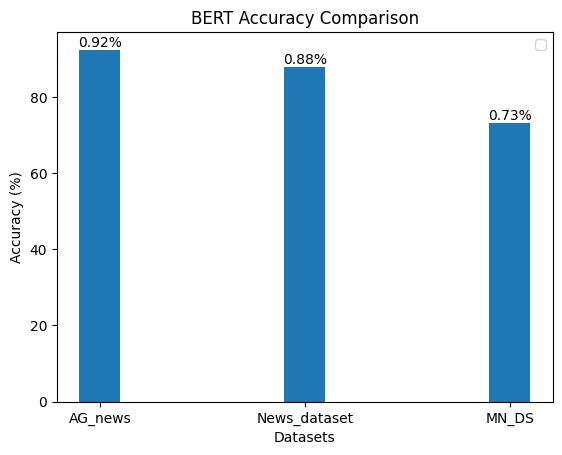

In [111]:
accuract_list_1 = [accuracy_4_1, accuracy_6_1, accuracy_17_1]

labels = ['AG_news', 'News_dataset', 'MN_DS']

plot_metrics(labels, accuract_list_1)
